# Schelling Model

In [17]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import time
from ipythonblocks import BlockGrid
from IPython.html import widgets
from IPython.display import display, clear_output
from IPython.html.widgets import interact

Populating the interactive namespace from numpy and matplotlib


## Project Outline

In 1971, the American economist Thomas Schelling created an agent-based model that might help explain why segregation is so difficult to combat. His model of segregation showed that even when individuals (or "agents") didn't mind being surrounded or living by agents of a different race, they would still choose to segregate themselves from other agents over time. Although the model is quite simple, it gives a fascinating look at how individuals might self-segregate, even when they have no explicit desire to do so.

The model was formulated in a social science context, but it has direct analogues to physical systems, such as in the mixing of liquids in an emulsion and the self-assembly of crystalline structures on metal surfaces. Emulsions are immiscible (incapable of mixing) colloidal suspensions of one liquid in another liquid. Emulsions will separate into their individual components if allowed to sit for long enough. Some examples of emulsions include: face creams, soapy water and salad dressings made by shaken oil and vinegar.


## Brainstorming

### Thought Process/Logic for writing the code

*Steps for creating a randomly generated board*

1. Create a blank board with a specified height and width.
2. Find the amount of spaces that should be red, find the amount of spaces that should be blue. 
3. Pick a random spot; if it is not red, make it red until there are as many red spaces as there should be. 
4. Pick a random spot; if it is not red and it is not blue, make it blue, until there are as many blue spaces as there should be.
5. Show the board.


*For a functioning Schelling Model*

1. Write an x and y for loop. It should check whether the block is red or blue. If it is, check its satisfaction rating. 
2. Create a blank array, then form an array of pieces of the grid that have a satisfaction rating below the threshold. 
3. In order, find a random open spot for each of the unsatisfied pieces. 
4. Have steps 1-3 repeat themselves for the specified number of iterations. 

### Necessary Functions

Functions for creating the board

* An overarching function that incorporates all the following: (InitialBoard)
* A function that makes a board based off adjustable Height/Width (BlankBoard)
* A function that finds the amount of squares that should be red and the amount that should be blue. (AmountCalculator)
* A function that finds a space that is "unpopulated" (FindtoFill)

Functions for running the Model

* An overaching function that incorporates all the following: (SchellingModel)
* A function that checks satisfaction rating including data of edges and corners (ICantGetNo)
* The same function as above that finds an unpopulated space (FindtoFill)


# Functions

### Functions for selling real estate

In [7]:
def BlankBoard(Width=25,Height=25):
    """Creates a blank white board with given width and height values."""
    board = BlockGrid(Width,Height,fill=(200,200,200))
    return board

def AmountCalculator(Width=25,Height=25,PopulationDensity=80,RedBlue=50):
    """Based off of Width, Height, Population Density, and Red/Blue percentages, calculates the amount of spots 
    that should be red and the amount of spots that should be blue."""
    AmountRed = int((PopulationDensity/100.)*((float(Height))*Width)*(RedBlue/100.))
    AmountBlue = int((PopulationDensity/100.)*((float(Height))*Width)*((100-RedBlue)/100.))
    return AmountRed, AmountBlue
    
def FindtoFill(board, Width, Height, color):
    """Generates random points on the board until it finds a blank one."""
    tally = 0
    attempts = 0
    while tally == 0:
        x = np.random.randint(0,Width)
        y = np.random.randint(0,Height)
        if (board[y,x].rgb != (0,0,255)) and (board[y,x].rgb != (255,0,0)):
            board[y,x] = color
            tally += 1
    return tally

def Initialboard(Width,Height,PopulationDensity,RedBlue,SatisfactionThreshold):
    """Creates a board that is ready to run iterations for a Schelling Model, by running B"""
    RED = (255,0,0)
    BLUE = (0,0,255)
    board = BlankBoard(Width,Height)
    AmountRed, AmountBlue = AmountCalculator(Width,Height,PopulationDensity,RedBlue)
    redtally = 0
    bluetally = 0
    while redtally < AmountRed:
        tally = FindtoFill(board, Width, Height, RED)
        if tally == 1:
            redtally += 1
    while bluetally < AmountBlue:
        tally = FindtoFill(board, Width, Height, BLUE)
        if tally == 1:
            bluetally += 1
    return board

### Functions for finding unsatisfied residents

In [8]:
def Checkup(board,j,i,color,friends,neighbors):
    """Checks the piece above board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If it is empty (white), 
    neighbors is reduced by 1."""
    if board[j-1,i].rgb == color:
        friends+=1
    if board[j-1,i].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors

def Checkupright(board,j,i,color,friends,neighbors):
    """Checks the piece above and to the right board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If it is
    empty (white), neighbors is reduced by 1."""
    if board[j-1,i+1].rgb == color:
        friends+=1
    if board[j-1,i+1].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors

def Checkupleft(board,j,i,color,friends,neighbors):
    """Checks the piece above and to the left board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If it is 
    empty (white), neighbors is reduced by 1."""
    if board[j-1,i-1].rgb == color:
        friends+=1
    if board[j-1,i-1].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors

def Checkleft(board,j,i,color,friends,neighbors):
    """Checks the piece to the left of board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If it is empty
    (white), neighbors is reduced by 1."""
    if board[j,i-1].rgb == color:
        friends+=1
    if board[j,i-1].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors

def Checkdownleft(board,j,i,color,friends,neighbors):
    """Checks the piece below and to the left of board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If it 
    is empty (white), neighbors is reduced by 1."""
    if board[j+1,i-1].rgb == color:
        friends+=1
    if board[j+1,i-1].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors

def Checkdown(board,j,i,color,friends,neighbors):
    """Checks the piece below board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If it is empty (white), 
    neighbors is reduced by 1."""
    if board[j+1,i].rgb == color:
        friends+=1
    if board[j+1,i].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors

def Checkdownright(board,j,i,color,friends,neighbors):
    """Checks the piece below and to the right of board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If 
    it is empty (white), neighbors is reduced by 1."""
    if board[j+1,i+1].rgb == color:
        friends+=1
    if board[j+1,i+1].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors

def Checkright(board,j,i,color,friends,neighbors):
    """Checks the piece to the right of board[j,i]. If it shares a color with board[j,i], friends is incremented by 1. If it is empty
    (white), neighbors is reduced by 1."""
    if board[j,i+1].rgb == color:
        friends+=1
    if board[j,i+1].rgb == (200,200,200):
        neighbors -=1
    return friends,neighbors
    
def Neighbors(board,y,x):
    """Determines the color of a given block and then counts the number of touching blocks, including diagonals."""
    if (((y == 0) or (y == board.height-1)) and ((x == 0) or (x == board.width-1))):
        neighbors = 3
    elif ((y == 0) or (y == board.height-1) or (x==0) or (x==board.width-1)):
        neighbors = 5
    else:
        neighbors = 8
    return neighbors    

def ICantGetNo(SatisfactionThreshold,board,Width,Height):
    """Satisfaction.
    
    Checks each piece of the board. If its satisfaction is below the threshold, it appends that piece to a list called
    unsatisfied. Satisfaction is found using the Neighbors function and each of the CheckDir functions."""
    unsatisfied = []
    for i in range(Width):
        for j in range(Height):
            friends = 0
            color = board[j,i].rgb
            if color == (200,200,200):
                Satisfaction = 101
            else:
                neighbors = Neighbors(board,j,i)
                if i != 0:
                    friends,neighbors = Checkleft(board,j,i,color,friends,neighbors)
                if i != Width-1:
                    friends,neighbors = Checkright(board,j,i,color,friends,neighbors)
                if j != 0:
                    friends,neighbors = Checkup(board,j,i,color,friends,neighbors)
                if j != Height-1:
                    friends,neighbors = Checkdown(board,j,i,color,friends,neighbors)
                if (i != 0 and j != 0):
                    friends,neighbors = Checkupleft(board,j,i,color,friends,neighbors)
                if (i != 0 and j != Height-1):
                    friends,neighbors = Checkdownleft(board,j,i,color,friends,neighbors)
                if (i != Width-1 and j != 0):
                    friends,neighbors = Checkupright(board,j,i,color,friends,neighbors)
                if (i != Width-1 and j != Height-1):
                    friends,neighbors = Checkdownright(board,j,i,color,friends,neighbors)
                if neighbors == 0:
                    Satisfaction = 0
                else:
                    Satisfaction = (float(friends)/neighbors)*100.
            if Satisfaction < SatisfactionThreshold:
                unsatisfied.append([j,i])
    return unsatisfied

### Functions that work with the moving company

In [23]:
def TheIterator(Width=10,Height=10,PopulationDensity=80,RedBlue=50,SatisfactionThreshold=50,Iterations=10,TimeInterval=0.5):
    """The large function that runs the Schelling Model. It uses the Initialboard function and ICantGetNo, each of which have multiple
    functions inside them. Necessary variables include the Width, Height, Population Density, Red vs. Blue population, Satisfaction 
    Threshold, Number of Iterations, and a Time Interval."""
    Start = Initialboard(Width,Height,PopulationDensity,RedBlue,SatisfactionThreshold)
    Start.show()
    if PopulationDensity ==100:
        print("There are no spaces available to move too. Schelling Model complete.")
    else:
        RollingStones = ICantGetNo(SatisfactionThreshold,Start,Width,Height)
        for i in range(Iterations):
            np.random.shuffle(RollingStones)
            for q in range(len(RollingStones)):
                Continue = 0
                while Continue == 0:
                    Continue = FindtoFill(Start, Width, Height,Start[RollingStones[q][0],RollingStones[q][1]].rgb)
                Start[RollingStones[q][0],RollingStones[q][1]].rgb = (200,200,200)
            RollingStones = ICantGetNo(SatisfactionThreshold,Start,Width,Height)
            if RollingStones == []:
                clear_output()
                Start.show()
                print("Everyone is muy contento.")
                break
            clear_output()
            Start.show()
            time.sleep(TimeInterval)
    return

### The Widgets

The following are variables that are given to various widgets, which will allow control of the Schelling Model.

In [29]:
Widthwidg=widgets.IntSlider(min=10,max=50,step=1,description='Width',value=25)
Heightwidg=widgets.IntSlider(min=10,max=50,step=1,description='Height',value=25)
PopulationDensitywidg=widgets.IntSlider(min=0,max=100,step=1,description='Population Density',value=80)
RedBluewidg=widgets.IntSlider(min=0,max=100,step=1,description='RedBlue',value=50)
SatisfactionThresholdwidg=widgets.IntSlider(min=0,max=100,step=1,description='Satisfaction Threshold',value=50)
Iterationswidg=widgets.IntSlider(min=1,max=100,step=1,description='Iterations',value=40)
TimeIntervalwidg=widgets.FloatSlider(min=0.05,max=1.0,step=0.05,description='Time Interval (s)',value=0.5)

SchellingButton = widgets.Button(description='Run Schelling Model')

def RunButton2(b):
    """Takes the value of each of the widgets and gives them to TheIterator to run the Schelling Model."""
    Width = Widthwidg.value
    Height = Heightwidg.value
    PopulationDensity = PopulationDensitywidg.value
    RedBlue = RedBluewidg.value
    SatisfactionThreshold = SatisfactionThresholdwidg.value
    Iterations = Iterationswidg.value
    TimeInterval = TimeIntervalwidg.value
    return TheIterator(Width,Height,PopulationDensity,RedBlue,SatisfactionThreshold,Iterations,TimeInterval)

## The Schelling Model in Action

In [30]:
display(Widthwidg)
display(Heightwidg)
display(PopulationDensitywidg)
display(RedBluewidg)
display(SatisfactionThresholdwidg)
display(Iterationswidg)
display(TimeIntervalwidg)

display(SchellingButton)
SchellingButton.on_click(RunButton2)

,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,


Everyone is muy contento.


## Analogue of the Specific Heat

### Background

The Schelling Model is not only useful as a rough representation of the way populations culturally or socioeconimcally segregate naturally. In a paper from 2009, many observtions were taken as they apply to Physics. The following is paralleled from the paper and is going to involve data taken by my program with my Schelling Model.



Useful information was found in an analogue with energy, so an analogue of the specific heat can be expected to give interesting results as well. Since the thermodynamic definition involves a derivative with respect to Tolerance and only a finite number of tolerances have physical meaning, we'll need to simplify the definition.

The specific heat is related to the energy fluctuations at equilibrium by the fluctuation-dissipation theorem. In the present contect the relevant formulation of  this important theorem is:

\begin{equation}
C_{s} = \frac{\langle E_{s}^{2} \rangle - \langle E_{s}\rangle^{2}}{T^{2}}
\end{equation}

We'll see how the fluctuation dissipation theorem stands with our Schelling Model.


### Data Collection

Plot Satisfaction Threshold vs. the fluctuation coefficient for multiple population densities.

The flucuation constant:

\begin{equation}
C_{s} = \frac{\langle E_{s}^{2} \rangle - \langle E_{s}\rangle^{2}}{T^{2}}
\end{equation}

where

\begin{equation}
E_{s} = -\sum_{\langle i,j \rangle} c_{i}c_{j} - (2T - 1)\sum_{\langle i,j \rangle}c_{i}^{2}c_{j}^{2}
\end{equation}

The sums include each nearest neighbor and next nearest neighbor (Left,right,up,down, and the diagonals). The value of each term is as follows:

\begin{equation}
c_{i}, c_{j}  = \left\{
   \begin{array}{3r}
   1 & : color = (255,0,0)\\
   0 & : color = (200,200,200)\\
   -1 & : color = (0,0,255)
   \end{array}
\right.
\end{equation}

### Functions for collecting data

Rather than going up and editing all the functions of the Schelling model, I'll copy them and add the data collection code necessary. This way, the Schelling Model demonstrated above won't be slowed down by storing or computing unnecessary data. To compute what we need, we need various pieces of information:

* Satisfaction Threshold (Tolerance)
* An edit for the check functions, that evaluates $c_{i}$ and $c_{j}$ (Done in ICantGetNo)
* Increment $E_{s}$ for each space checked (Done in ICantGetNo)
* Append $E_{s}$ to a list once each spot has been checked (Returned in ICantGetNo)
* A variable that calculates $C_{s}$ with a large number of iterations at equilibrium and appends it to a data point with the Tolerance

In [55]:
def ICantGetNo2(SatisfactionThreshold,board,Width,Height):
    """Checks each piece of the board. If its satisfaction is below the threshold, it appends that piece to a list called
    unsatisfied. This new and improved version of ICantGetNo is for calculating the Analogue of specific heat."""
    unsatisfied = []
    
    # New code
    Es = 0
    # End new code
    
    for i in range(Width):
        for j in range(Height):
            friends = 0
            color = board[j,i].rgb
            if color == (200,200,200):
                Satisfaction = 101
            else:
                neighbors = Neighbors(board,j,i)
                if i != 0:
                    friends,neighbors = Checkleft(board,j,i,color,friends,neighbors)
                if i != Width-1:
                    friends,neighbors = Checkright(board,j,i,color,friends,neighbors)
                if j != 0:
                    friends,neighbors = Checkup(board,j,i,color,friends,neighbors)
                if j != Height-1:
                    friends,neighbors = Checkdown(board,j,i,color,friends,neighbors)
                if (i != 0 and j != 0):
                    friends,neighbors = Checkupleft(board,j,i,color,friends,neighbors)
                if (i != 0 and j != Height-1):
                    friends,neighbors = Checkdownleft(board,j,i,color,friends,neighbors)
                if (i != Width-1 and j != 0):
                    friends,neighbors = Checkupright(board,j,i,color,friends,neighbors)
                if (i != Width-1 and j != Height-1):
                    friends,neighbors = Checkdownright(board,j,i,color,friends,neighbors)
                if neighbors == 0:
                    Satisfaction = 0
                else:
                    Satisfaction = (float(friends)/neighbors)*100.
                # New code
                Es -= float((friends - (neighbors - friends) + ((2*SatisfactionThreshold/100.) - 1)*neighbors))
                # End new code
            if Satisfaction < SatisfactionThreshold:
                unsatisfied.append([j,i])
    return unsatisfied, Es

def TheIterator2(Width=10,Height=10,PopulationDensity=80,RedBlue=50,SatisfactionThreshold=50,Iterations = 100,TimeInterval=0.5):
    """This new version of TheIterator takes data on Iterations 50 and up, to find the fluctuation coefficient.""" 
    Start = Initialboard(Width,Height,PopulationDensity,RedBlue,SatisfactionThreshold)
    if PopulationDensity ==100:
        print "There are no spaces available to move too. Schelling Model complete."
    else:
        RollingStones = ICantGetNo(SatisfactionThreshold,Start,Width,Height)
        EsList = []
        EsSqList = []
        for i in range(Iterations):
            np.random.shuffle(RollingStones)
            if i < 50:
                for q in range(len(RollingStones)):
                    Continue = 0
                    while Continue == 0:
                        Continue = FindtoFill(Start, Width, Height,Start[RollingStones[q][0],RollingStones[q][1]].rgb)
                    Start[RollingStones[q][0],RollingStones[q][1]].rgb = (200,200,200)
                RollingStones = ICantGetNo(SatisfactionThreshold,Start,Width,Height)
            else:
                for q in range(len(RollingStones)):
                    Continue = 0
                    while Continue == 0:
                        Continue = FindtoFill(Start,Width,Height,Start[RollingStones[q][0],RollingStones[q][1]].rgb)
                    Start[RollingStones[q][0],RollingStones[q][1]].rgb = (200,200,200)
                RollingStones, Es = ICantGetNo2(SatisfactionThreshold,Start,Width,Height)
                EsList.append(Es)
                EsSqList.append(Es**2)
    Cs = (np.mean(EsSqList) - (np.mean(EsList)**2))/(SatisfactionThreshold/10000.)
    return Cs

def DataCollector(PopulationDensity):
    """This function collects data for a given Population Density. It will create a list of fluctuation coefficients for various
    Satisfaction Thresholds. This is very hard to run because it involves creating 14 Schelling Models, and each one is 20x20, with
    75 iterations."""
    Threshold = np.arange(30,100,5)
    data = []
    for i in Threshold:
        data.append(round(TheIterator2(20,20,PopulationDensity,50,i,75,0.1),3))
    data.append(0)
    return data

### Calling the Data Function

**Be cautious when running the following code. It involves running a total of 84 Schelling models, each is 20x20 and has 75 iterations, collecting large amounts of data from each iteration.**

This will take several minutes, but will result in the data that will be graphed.

In [44]:
Threshold = np.arange(0.30,1.05,0.05)
tenpercent = DataCollector(90)
twentypercent = DataCollector(80)
thirtypercent = DataCollector(70)
fortypercent = DataCollector(60)
fiftypercent = DataCollector(50)
sixtypercent = DataCollector(40)

### Analogue of Specific Heat Graph

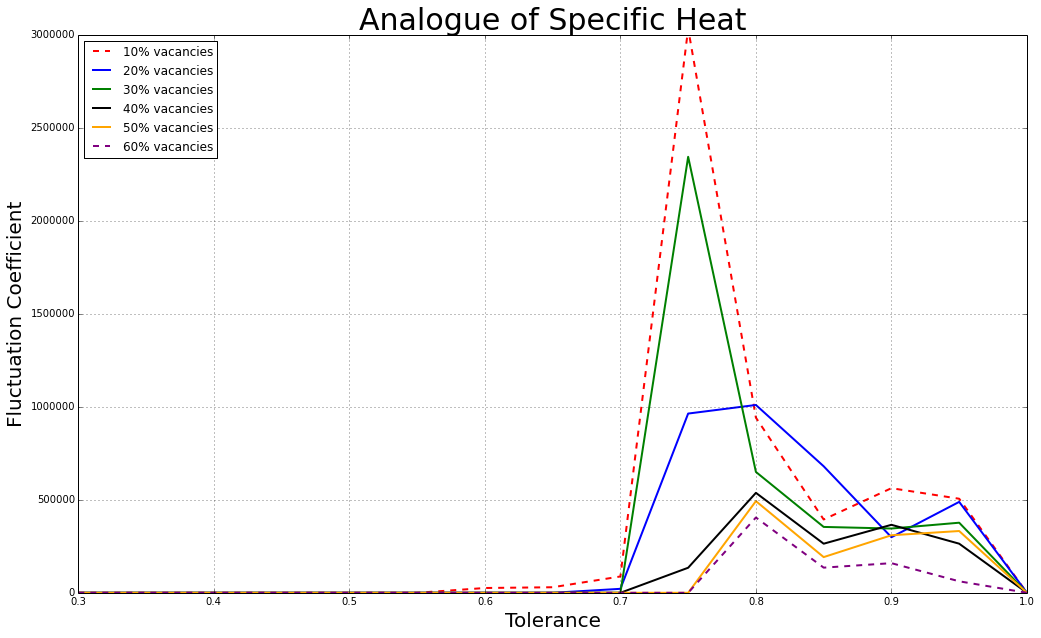

In [56]:
plt.figure(figsize=[17,10])
plt.plot(Threshold,tenpercent,color = 'r', linestyle = '--',label = '10% vacancies', linewidth=2)
plt.plot(Threshold,twentypercent,color = 'b', label = '20% vacancies',linewidth=2)
plt.plot(Threshold,thirtypercent,color = 'g', label = '30% vacancies',linewidth=2)
plt.plot(Threshold,fortypercent,color = 'black',label = '40% vacancies',linewidth=2)
plt.plot(Threshold,fiftypercent,color = 'orange',label = '50% vacancies',linewidth=2)
plt.plot(Threshold,sixtypercent,color = 'purple', linestyle = '--',linewidth=2,label = '60% vacancies')

plt.xlim(0.30,1.00)
plt.ylim(0,3000000)

plt.legend(loc='upper left')

plt.xlabel('Tolerance',fontsize=20)
plt.ylabel('Fluctuation Coefficient',fontsize=20)
plt.title('Analogue of Specific Heat',fontsize=30)

plt.grid()


This data doesn't look too bad. As it relates to the data from the paper, it has the same overall shape. The sample size however, in both the paper and in my data, is quite small, since there is a very large amount of data being taken, and it takes a long time to run.